In [81]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras import Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import datasets, layers, models
%matplotlib inline

(256, 256, 3)


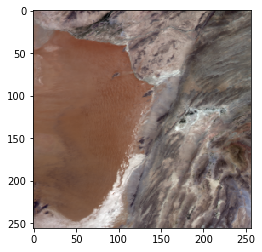

In [19]:
data = np.load('all_image_data.npy', allow_pickle=True)
# data[class name][image number][0][0]
np_img = data[3][100][0][0]
print(np_img.shape)
#print(np_img)
plt.imshow(np_img)
plt.show()

In [37]:
IMG_HEIGHT,IMG_WIDTH = (256, 256)

In [53]:
def create_dataset(filename):
   
    img_data_array = []
    class_name = []
   
    for class_label in range(6):
        for ii, file in enumerate(data[class_label]):
       
            image = data[class_label][ii][0][0]
            image = image.astype('float32')
            image /= 256
            img_data_array.append(image)
            class_name.append(class_label)
            
    img_data_array = np.array(img_data_array)
    class_name = np.array(class_name)
            
    return img_data_array, class_name

In [54]:
# extract the image array and class name
img_data, class_name = create_dataset(data)

In [55]:
target_val = class_name

In [41]:
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(6)
        ])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
history = model.fit(x=np.array(img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=5)

Train on 6225 samples
Epoch 1/5
6225/6225 [==============================] - 12s 2ms/sample - loss: 8.9503 - accuracy: 0.1730
Epoch 2/5
6225/6225 [==============================] - 3s 560us/sample - loss: 8.9829 - accuracy: 0.1688
Epoch 3/5
6225/6225 [==============================] - 4s 570us/sample - loss: 8.9829 - accuracy: 0.1688
Epoch 4/5
6225/6225 [==============================] - 4s 565us/sample - loss: 8.9829 - accuracy: 0.1688
Epoch 5/5
6225/6225 [==============================] - 4s 567us/sample - loss: 8.9829 - accuracy: 0.1688


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img_data, target_val, test_size=0.33, random_state=42)

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4170, 256, 256, 3), (2055, 256, 256, 3), (4170,), (2055,))

In [66]:
class_names = ['Cloud', 'Dust', 'Haze', 'Land', 'Seaside', 'Smoke']

In [59]:
train_labels = np.array([0,1,2,3,4,5])

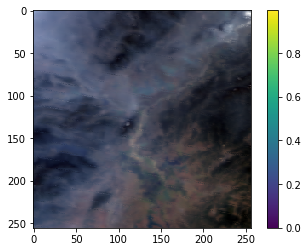

In [61]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

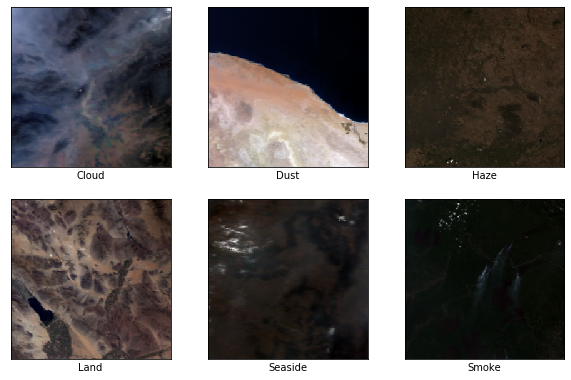

In [69]:
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [104]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(6))

In [105]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [106]:
model.fit(X_train, y_train, epochs=20)

Train on 4170 samples
Epoch 1/20
4170/4170 [==============================] - 5s 1ms/sample - loss: 1.3107 - accuracy: 0.4561
Epoch 2/20
4170/4170 [==============================] - 4s 903us/sample - loss: 0.9567 - accuracy: 0.6343
Epoch 3/20
4170/4170 [==============================] - 4s 894us/sample - loss: 0.8004 - accuracy: 0.6981
Epoch 4/20
4170/4170 [==============================] - 4s 913us/sample - loss: 0.6921 - accuracy: 0.7336
Epoch 5/20
4170/4170 [==============================] - 4s 921us/sample - loss: 0.5346 - accuracy: 0.8084
Epoch 6/20
4170/4170 [==============================] - 4s 903us/sample - loss: 0.4017 - accuracy: 0.8568
Epoch 7/20
4170/4170 [==============================] - 4s 904us/sample - loss: 0.2788 - accuracy: 0.9007
Epoch 8/20
4170/4170 [==============================] - 4s 906us/sample - loss: 0.1842 - accuracy: 0.9348
Epoch 9/20
4170/4170 [==============================] - 4s 912us/sample - loss: 0.1374 - accuracy: 0.9552
Epoch 10/20
4170/4170 [===

In [107]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

2055/1 - 1s - loss: 2.5650 - accuracy: 0.6861

Test accuracy: 0.68613136
